Zebra

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
img = cv2.imread("/content/zebra.jpg")

In [ ]:
img.shape

(853, 1280, 3)

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
img.shape

(853, 1280)

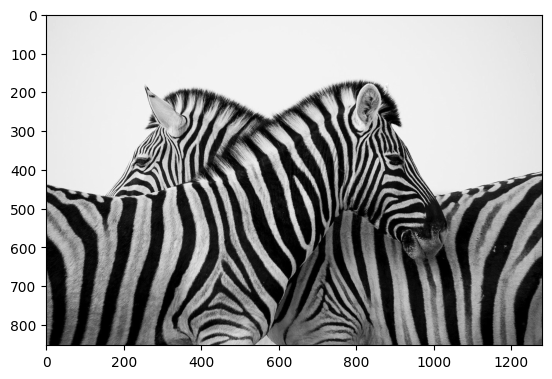

In [ ]:
plt.imshow(img, cmap="gray")

In [ ]:
th = 150
maxvalue = 255

In [ ]:
thr, new = cv2.threshold(img, th, maxvalue, cv2.THRESH_BINARY)

In [ ]:
type(thr), type(new)

(float, numpy.ndarray)

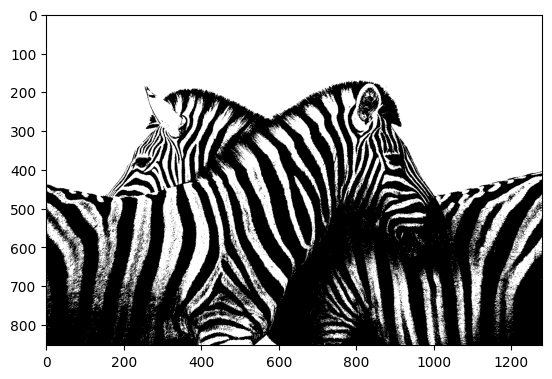

In [ ]:
plt.imshow(new, cmap="gray")

In [ ]:
set(new[-1])

{0, 255}

In [ ]:
new.shape

(853, 1280)

In [ ]:
img

array([[225, 225, 225, ..., 221, 221, 221],
       [225, 225, 225, ..., 221, 221, 221],
       [225, 225, 225, ..., 221, 221, 221],
       ...,
       [105,  99,  95, ...,  85,  88,  88],
       [ 98,  98, 108, ...,  86,  89,  90],
       [111, 115, 124, ...,  91,  96,  97]], dtype=uint8)

Chess

In [ ]:
chess = cv2.imread("/content/chess.png")
chess2 = cv2.imread("/content/chess2.png")

In [ ]:
chess = cv2.cvtColor(chess, cv2.COLOR_BGR2GRAY)
chess2 = cv2.cvtColor(chess2, cv2.COLOR_BGR2GRAY)

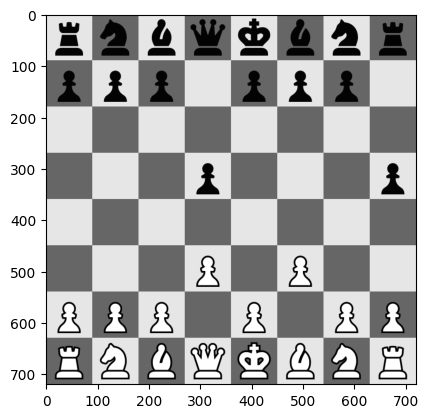

In [ ]:
plt.imshow(chess, cmap="gray")

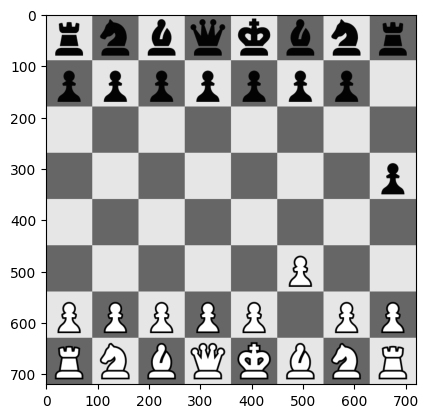

In [ ]:
plt.imshow(chess2, cmap="gray")

In [ ]:
chess, chess2

(array([[235, 235, 235, ..., 133, 133, 133],
        [235, 235, 235, ..., 133, 133, 133],
        [235, 235, 235, ..., 133, 133, 133],
        ...,
        [133, 133, 133, ..., 235, 235, 235],
        [133, 133, 133, ..., 235, 235, 235],
        [133, 133, 133, ..., 235, 235, 235]], dtype=uint8),
 array([[235, 235, 235, ..., 133, 133, 133],
        [235, 235, 235, ..., 133, 133, 133],
        [235, 235, 235, ..., 133, 133, 133],
        ...,
        [133, 133, 133, ..., 235, 235, 235],
        [133, 133, 133, ..., 235, 235, 235],
        [133, 133, 133, ..., 235, 235, 235]], dtype=uint8))

In [ ]:
th = 150
maxvalue = 255

In [ ]:
thr, new1 = cv2.threshold(chess, th, maxvalue, cv2.THRESH_BINARY)

In [ ]:
thr, new2 = cv2.threshold(chess2, th, maxvalue, cv2.THRESH_BINARY)

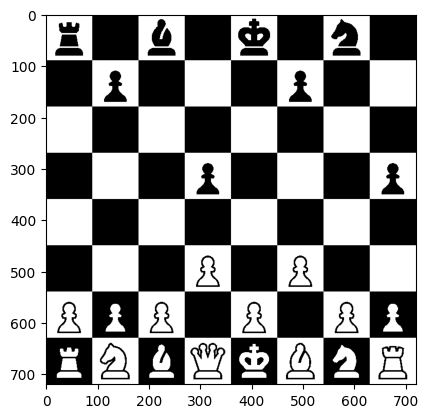

In [ ]:
plt.imshow(new1, cmap="gray")

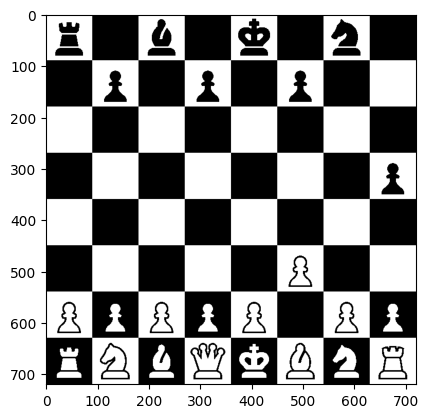

In [ ]:
plt.imshow(new2, cmap="gray")

In [ ]:
dif = cv2.absdiff(new1,new2)

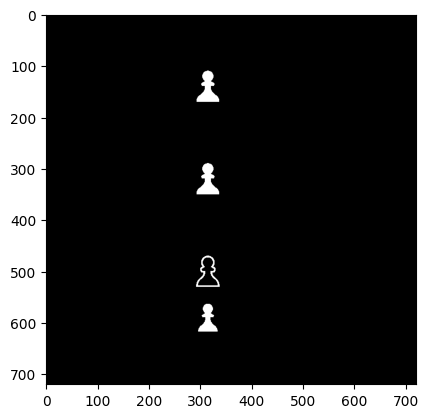

In [ ]:
plt.imshow(dif, cmap="gray")

In [ ]:
res3 = cv2.bitwise_xor(chess,chess2)

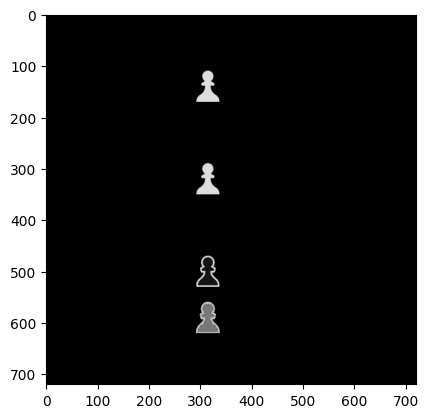

In [ ]:
plt.imshow(res3, cmap="gray")

In [ ]:
new1.shape, new2.shape

((720, 720), (720, 720))

Image Contours

In [ ]:
image = cv2.imread("/content/handwritten.png")
copy = image.copy()

In [ ]:
from google.colab.patches import cv2_imshow

Process on handwritten.png

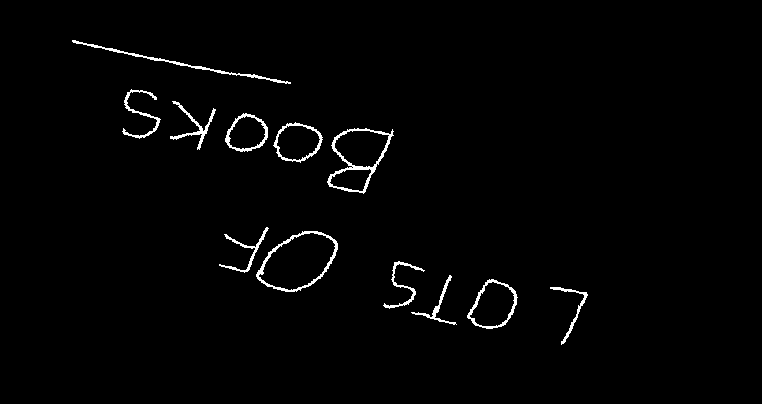

In [ ]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thr, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_OTSU)
cv2_imshow(binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
cont_list,_ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
for con in cont_list:
  x,y,w,h = cv2.boundingRect(con)
  cv2.rectangle(image, (x,y), (x+w, y+h), (0, 255, 255),4)
  cv2.rectangle()

In [ ]:
  x,y,w,h

(327, 128, 67, 66)

In [ ]:
x+w

394

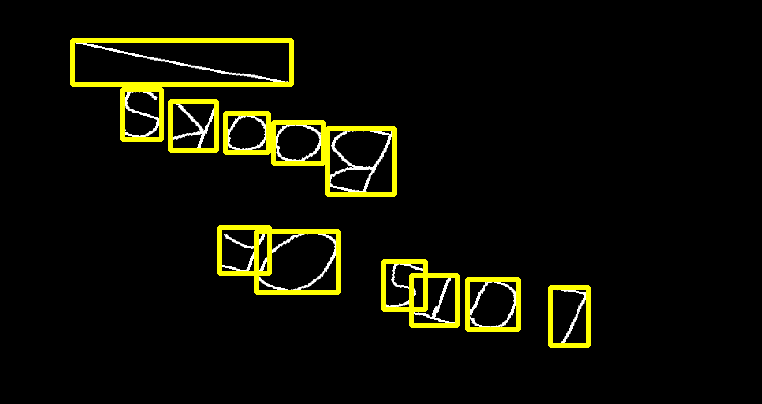

In [ ]:
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

Process on b.png

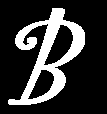

In [ ]:
b_gray = cv2.imread("/content/b.png", cv2.IMREAD_GRAYSCALE)
b_thr, b_binary = cv2.threshold(b_gray, 0, 255, cv2.THRESH_OTSU)
cv2_imshow(b_binary)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
import sys
b_list,_ = cv2.findContours(b_binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

if len(b_list) == 1:
  cont_b = b_list[0]
else:
  sys.exit()

#similar to modeling
sim_list = []
for cnt in cont_list:
  ret = cv2.matchShapes(cnt, cont_b, cv2.CONTOURS_MATCH_I1,0)
  sim_list.append(ret)

min_con = min(sim_list)
index = sim_list.index(min_con)

Search on handwritten.png with b.png

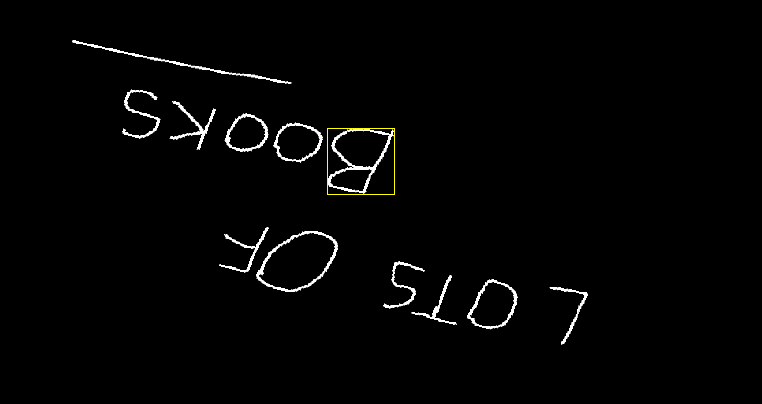

In [ ]:
ret_cont = cont_list[index]
x, y, w, h = cv2.boundingRect(ret_cont)
cv2.rectangle(copy, (x,y), (x+w, y+h), (0, 255, 255),1)
cv2_imshow(copy)
cv2.waitKey(0)
cv2.destroyAllWindows()